# POWER CONSUMPTION PROJECT

In [1]:
# Host, user and kernel for Ahnaf Muizz Chowdhury
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-IVNLUFL
desktop-ivnlufl\user
C:\Users\User\anaconda3\python.exe
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0)


In [1]:
# Host, user and kernel for Miles St. James
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Milesengcomp
milesengcomp\mmstj
C:\Users\MMSTJ\anaconda3\python.exe
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0)


In [13]:
#importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statistics as st

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
#Reading the file containing the database
power = pd.read_csv("Tetuan City power consumption.csv")
power

DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/17 0:00        6.559      73.8       0.083   
1         1/1/17 0:10        6.414      74.5       0.083   
2         1/1/17 0:20        6.313      74.5       0.080   
3         1/1/17 0:30        6.121      75.0       0.083   
4         1/1/17 0:40        5.921      75.7       0.081   
...               ...          ...       ...         ...   
52411  12/30/17 23:10        7.010      72.4       0.080   
52412  12/30/17 23:20        6.947      72.6       0.082   
52413  12/30/17 23:30        6.900      72.8       0.086   
52414  12/30/17 23:40        6.758      73.0       0.080   
52415  12/30/17 23:50        6.580      74.1       0.081   

       Zone 1 Power Consumption  Zone 2 Power Consumption  \
0                   34055.69620               16128.87538   
1                   29814.68354               19375.07599   
2                   29128.10127               19006.68693   
3                   28228.86076               18361.09422   
4                   27335.69620               17872.34043   
...                         ...                       ...   
52411               31160.45627               26857.31820   
52412               30430.41825               26124.57809   
52413               29590.87452               25277.69254   
52414               28958.17490               24692.23688   
52415               28349.80989               24055.23167   

       Zone 3 Power Consumption  
0                   20240.96386  
1                   20131.08434  
2                   19668.43373  
3                   18899.27711  
4                   18442.40964  
...                         ...  
52411               14780.31212  
52412               14428.81152  
52413               13806.48259  
52414               13512.60504  
52415               13345.49820  

[52416 rows x 7 columns]

# Database Description

In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   Zone 1 Power Consumption  52416 non-null  float64
 5   Zone 2 Power Consumption  52416 non-null  float64
 6   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [ ]:
power.head()

DateTime  Temperature  Humidity  Wind Speed  Zone 1 Power Consumption  \
0  1/1/17 0:00        6.559      73.8       0.083               34055.69620   
1  1/1/17 0:10        6.414      74.5       0.083               29814.68354   
2  1/1/17 0:20        6.313      74.5       0.080               29128.10127   
3  1/1/17 0:30        6.121      75.0       0.083               28228.86076   
4  1/1/17 0:40        5.921      75.7       0.081               27335.69620   

   Zone 2 Power Consumption  Zone 3 Power Consumption  
0               16128.87538               20240.96386  
1               19375.07599               20131.08434  
2               19006.68693               19668.43373  
3               18361.09422               18899.27711  
4               17872.34043               18442.40964

In [ ]:
power.describe()

Temperature      Humidity    Wind Speed  Zone 1 Power Consumption  \
count  52416.000000  52416.000000  52416.000000              52416.000000   
mean      18.810024     68.259518      1.959489              32344.970564   
std        5.815476     15.551177      2.348862               7130.562564   
min        3.247000     11.340000      0.050000              13895.696200   
25%       14.410000     58.310000      0.078000              26310.668692   
50%       18.780000     69.860000      0.086000              32265.920340   
75%       22.890000     81.400000      4.915000              37309.018185   
max       40.010000     94.800000      6.483000              52204.395120   

       Zone 2 Power Consumption  Zone 3 Power Consumption  
count              52416.000000              52416.000000  
mean               21042.509082              17835.406218  
std                 5201.465892               6622.165099  
min                 8560.081466               5935.174070  
25%                16980.766032              13129.326630  
50%                20823.168405              16415.117470  
75%                24713.717520              21624.100420  
max                37408.860760              47598.326360

# Description of the Database
The database contains 52416 non-null objects or rows. There are 7 columns: DateTime, Temperature,	Humidity,	Wind Speed,	Zone 1 Power Consumption,	Zone 2 Power Consumption and Zone 3 Power Consumption. The three weather parameters and independent variables for our model are Temperature, Humidity and Wind Speed. The dependent variable are the three zones in which power consumption will be estimated.

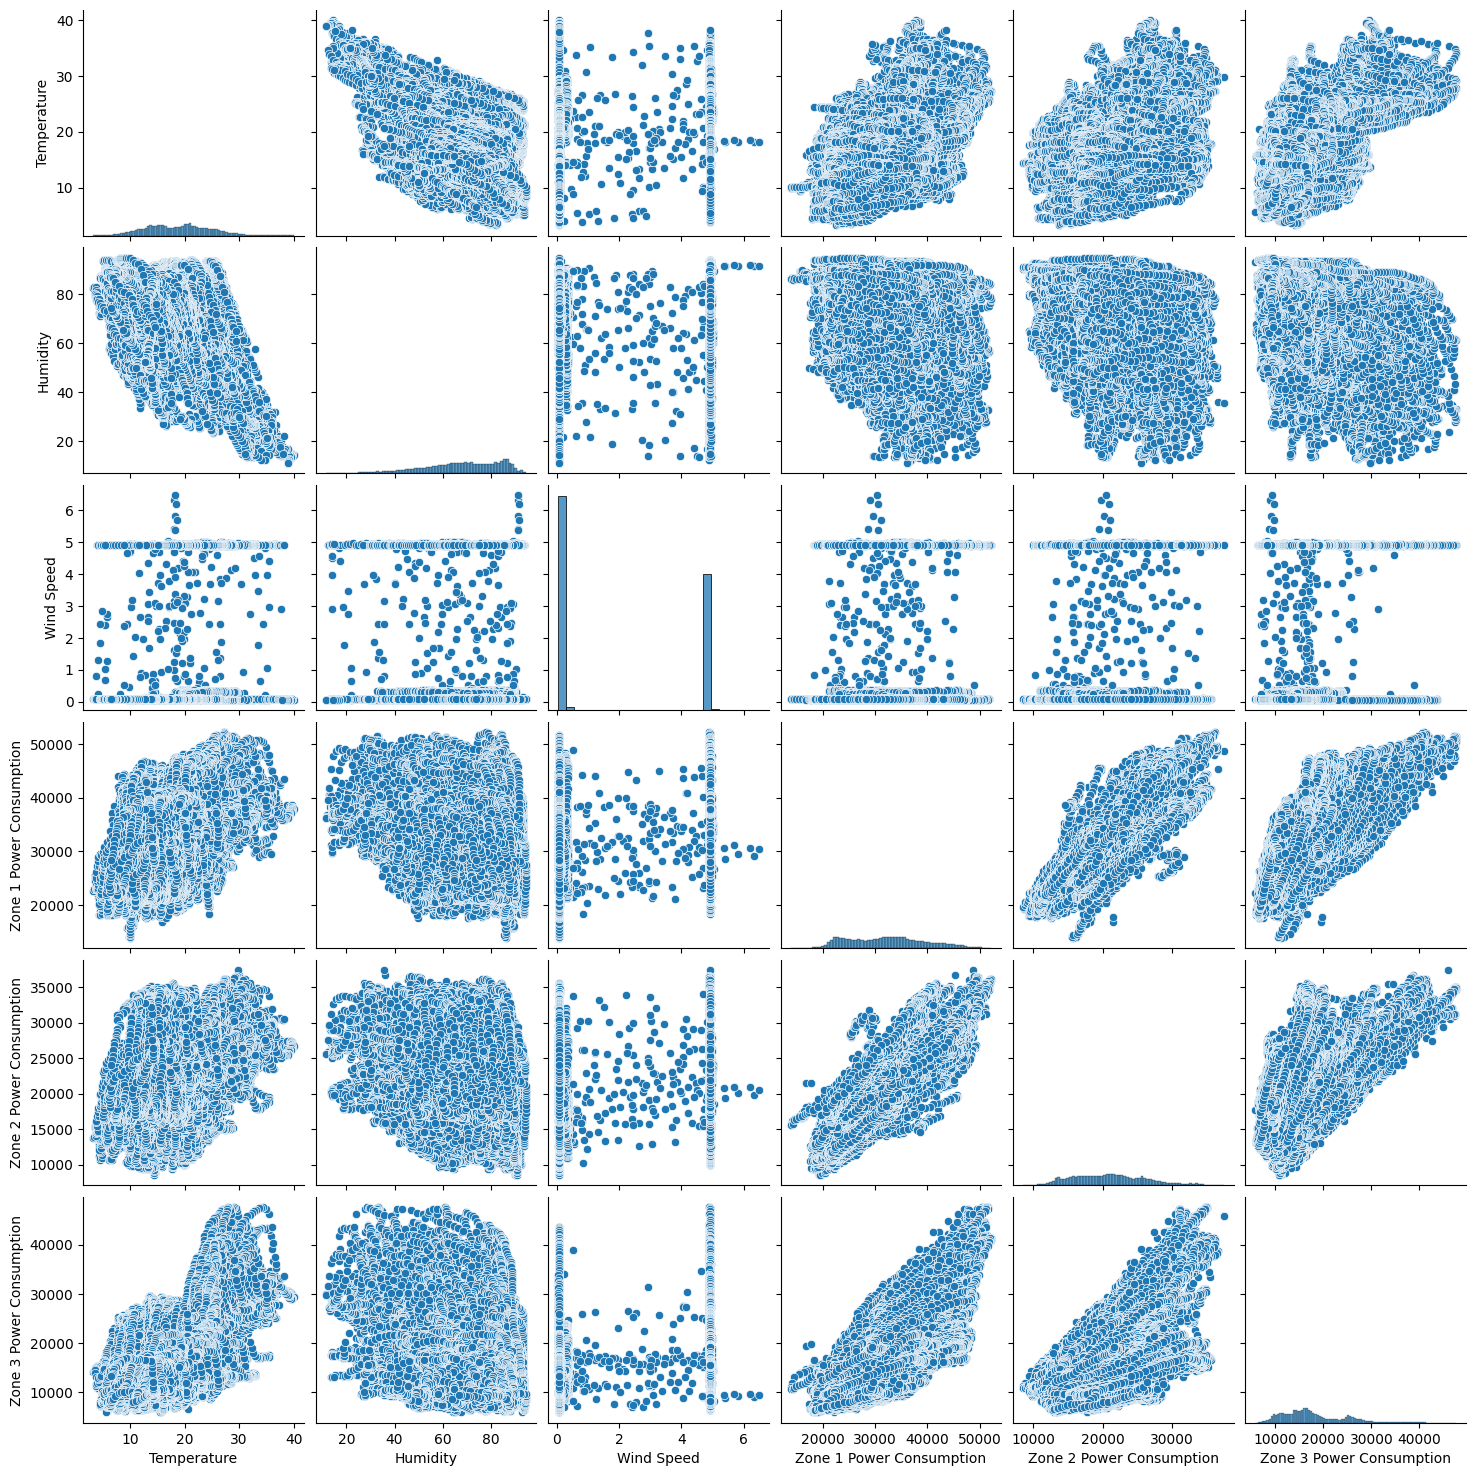

In [ ]:
sns.pairplot(power)
plt.show()

# Pairplots Description
Pairplots have been created for all of the columns in the database. All the plots show significant distribution of data plots from which relationships and predictions can be estimated. The pairplots for Wind Speed shows some outliers which will be corrected for in the next code line. All other data columns don't show any obvious outliers and can be processed for data modelling.  

# Reformating Database
The column headings for the database looks alright so no change was made in the column headings. However, the Wind Speed column contains some outliers.

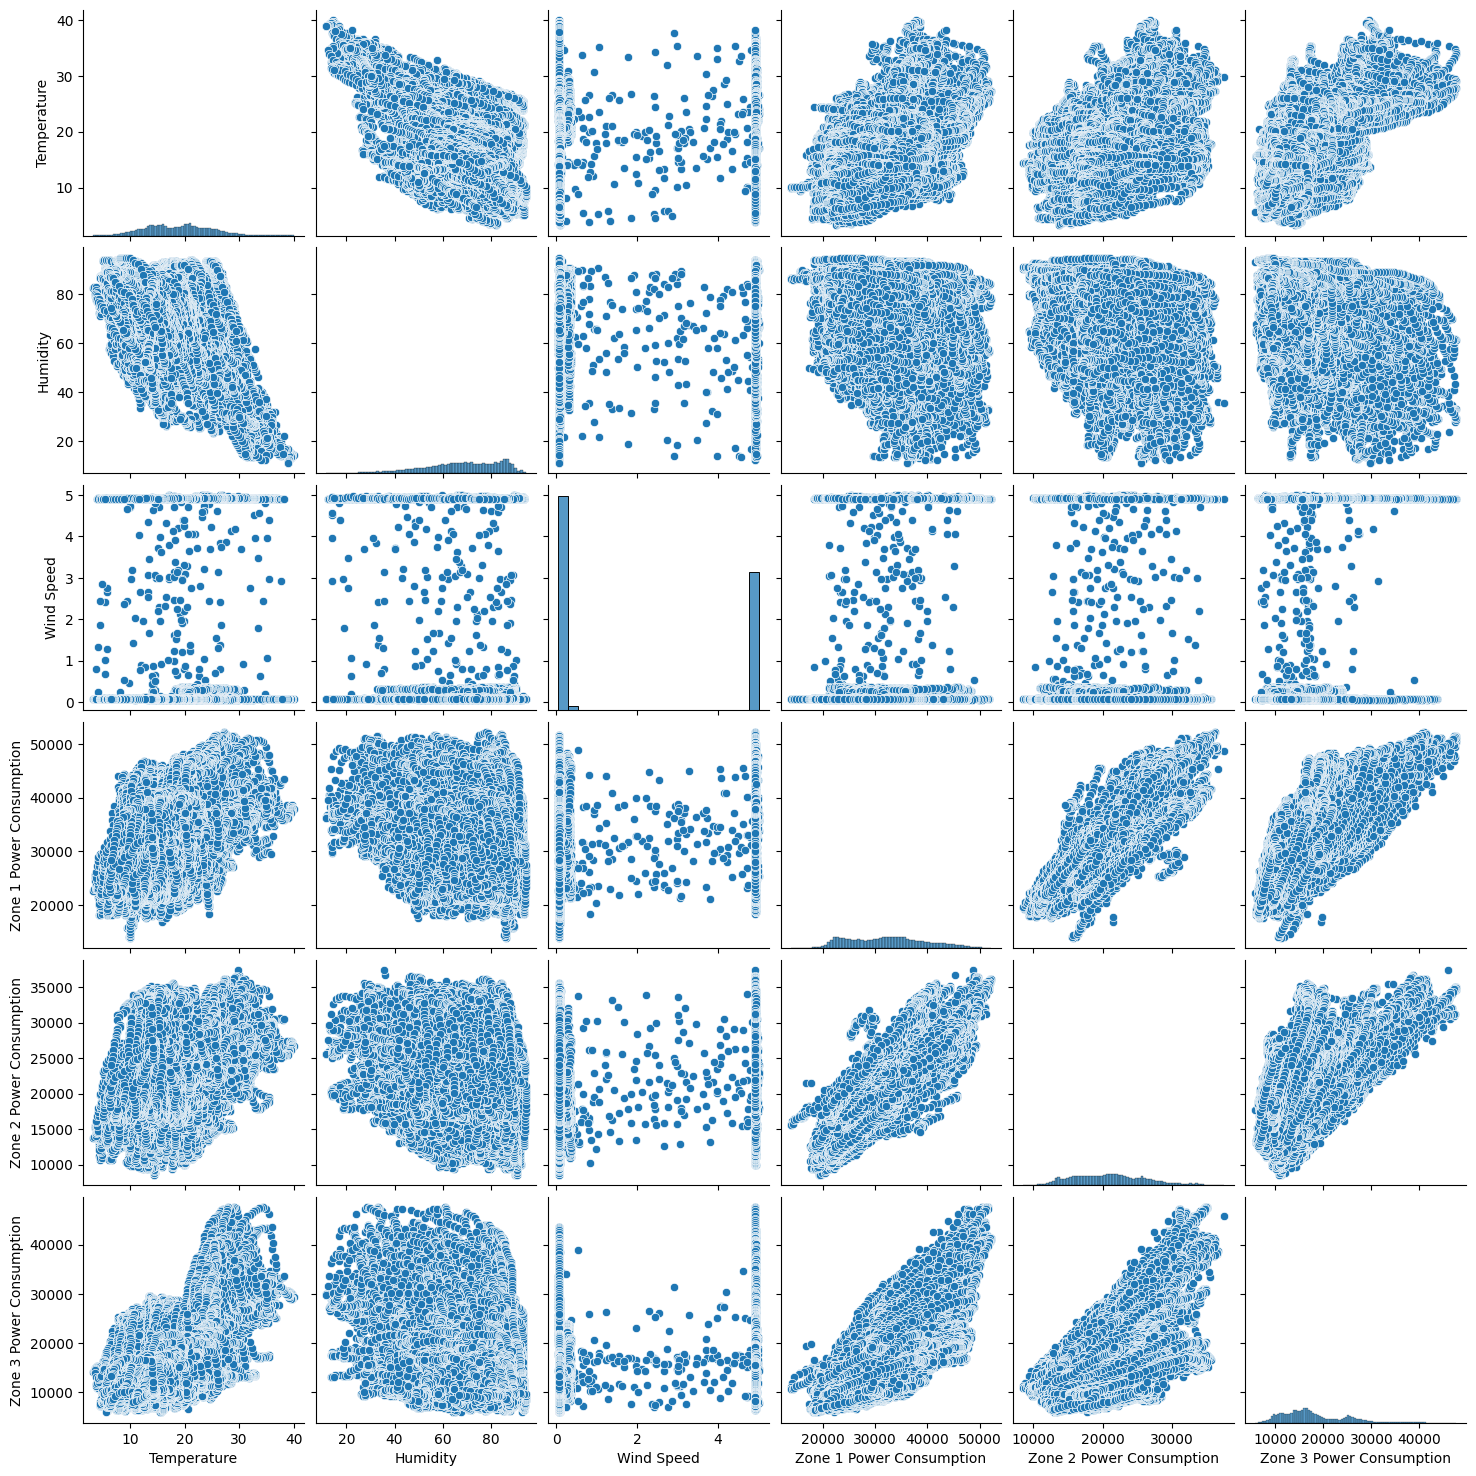

In [ ]:
#Removing outliers in the Wind Speed column
power=power.drop(power[power["Wind Speed"]>5].index)
sns.pairplot(power)
plt.show()

# Database after reformating
After reformating, the Database now contains 52397 unique rows and 7 columns.<br> The Windspeed pairplot now shows no outliers. <br>

---


**Temperature**:
The scatter plot for temperature and zone power consumption has a noticeable trend suggesting a non-linear relationship. The data points are densely clustered, particularly in the middle temperature range, indicating higher data density around these values. <br>
<br>
**Humidity:**
The scatter plot for humidity and zone power consumption does not show a strong or clear linear relationship. The data points appear to be more uniformly distributed across the range of humidity levels. <br>
<br>
**Wind Speed**:
The scatter plot for windspeed and zone power consumption appear more scatter compared to the other plots with no obvious power correlation between them. There are clusters at the lower and higher end of wind speed suggesting more observations at extreme wind speeds.



In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52397 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52397 non-null  object 
 1   Temperature               52397 non-null  float64
 2   Humidity                  52397 non-null  float64
 3   Wind Speed                52397 non-null  float64
 4   Zone 1 Power Consumption  52397 non-null  float64
 5   Zone 2 Power Consumption  52397 non-null  float64
 6   Zone 3 Power Consumption  52397 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.2+ MB


# **Multivariate (Multilinear Regression Model)**
Independent variables: Temperature, Humidity, Wind Speed <br>
Dependent variable: Zone 1/2/3 Power Consumption

# Zone 1 Power Consumption Multilinear Models

## Zone 1 Multilinear Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

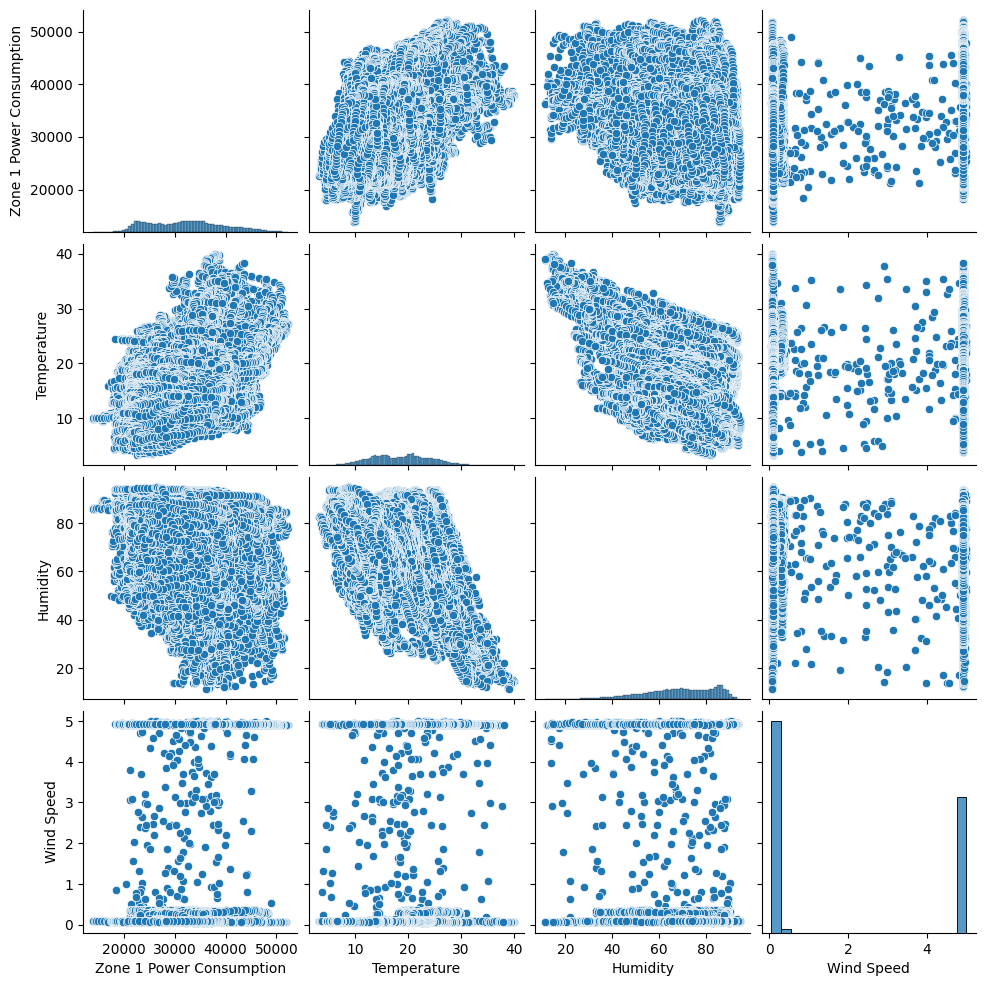

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 1 Power Consumption", "Temperature", "Humidity", "Wind Speed"]])
plt.show()

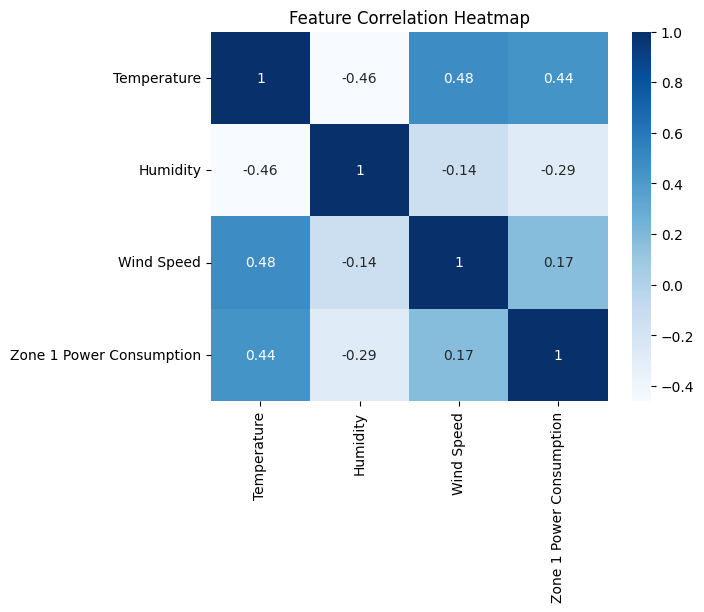

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 1 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.20245723909991098
Mean squared error: 40436008.49725999
Root mean squared error: 6358.931395860471

Model evaluation metrics for the test set:
R-squared value: 0.21179231145137745
Mean squared error: 40589343.92082117
Root mean squared error: 6370.976685000594

Model Parameters:
Coefficients: [ 508.48981181  -45.92730232 -139.88231869]
Interecept: 26171.149694522654


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.204
Model:                                  OLS   Adj. R-squared:                  0.204
Method:                       Least Squares   F-statistic:                     4486.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              08:46:16   Log-Likelihood:            -5.3324e+05
No. Observations:               

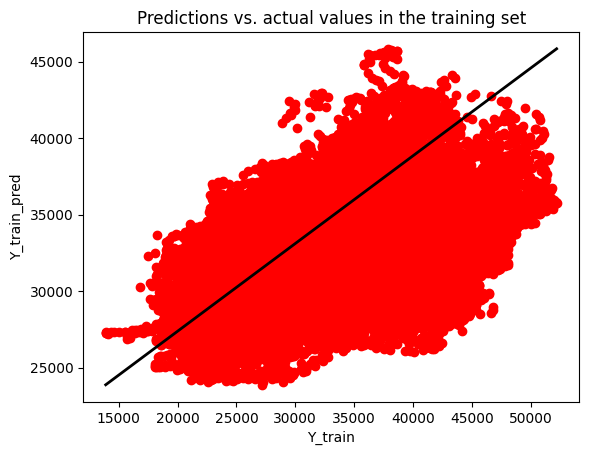

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

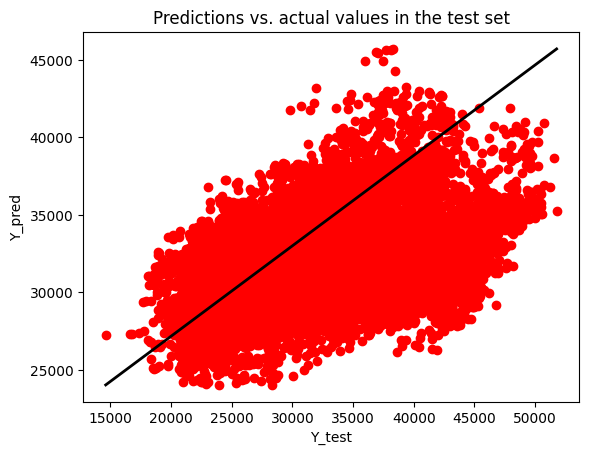

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

## Zone 1 Multilinear Regression Model (TH)
2 weather parameters: Temperature and Humidity

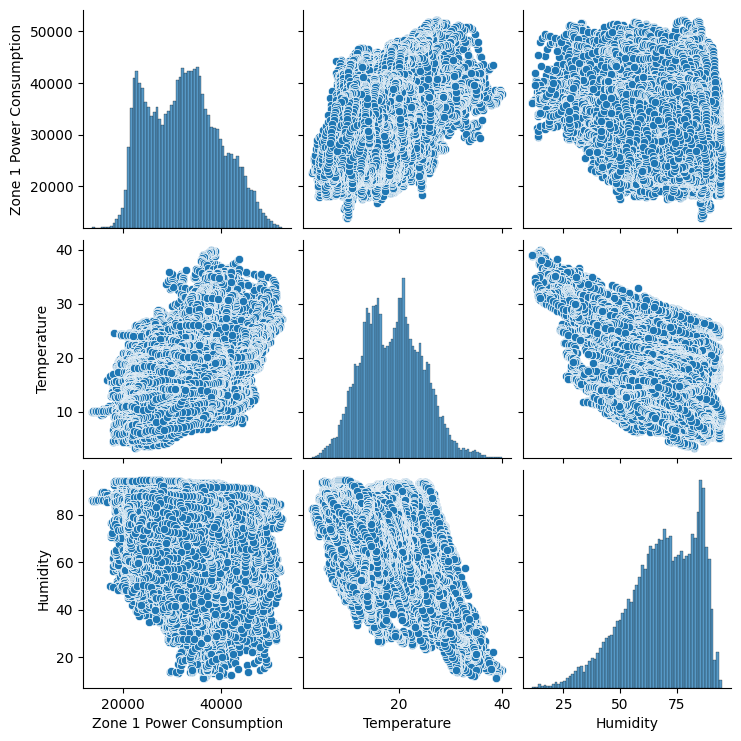

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 1 Power Consumption", "Temperature", "Humidity"]])
plt.show()

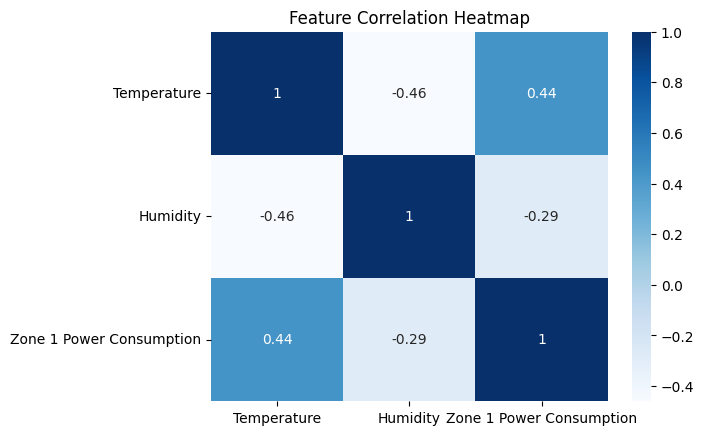

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption', 'Wind Speed']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Humidity"]]
y = power["Zone 1 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.20083022868570755
Mean squared error: 40518499.129937306
Root mean squared error: 6365.414293660492

Model evaluation metrics for the test set:
R-squared value: 0.21094371081611307
Mean squared error: 40633043.24466258
Root mean squared error: 6374.405324786194

Model Parameters:
Coefficients: [478.66898208 -48.19575756]
Interecept: 26612.3531876525


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.203
Model:                                  OLS   Adj. R-squared:                  0.203
Method:                       Least Squares   F-statistic:                     6668.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              09:08:11   Log-Likelihood:            -5.3329e+05
No. Observations:                     52397   AIC

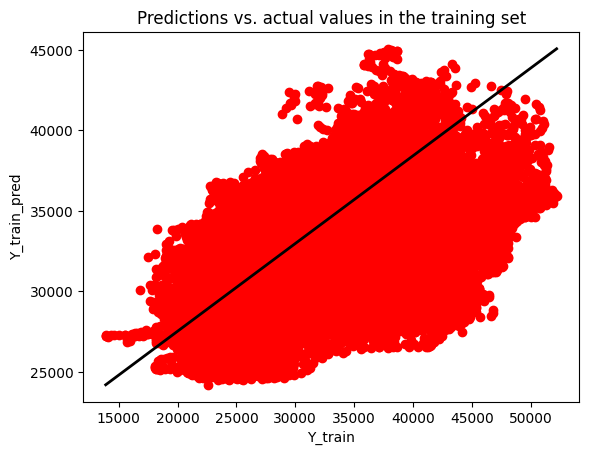

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

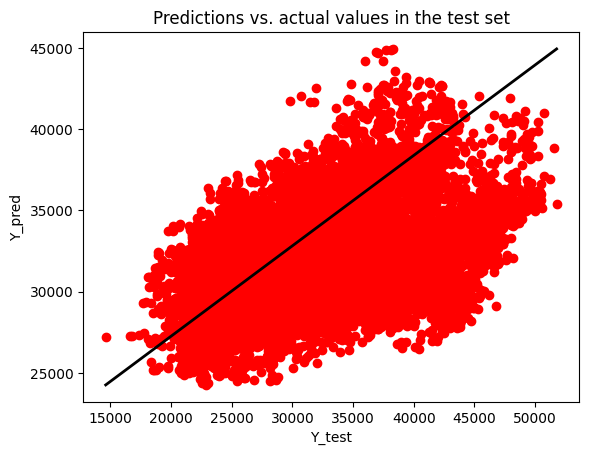

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

# Zone 2 Power Consumption Multilinear Models

## Zone 2 Multilinear Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

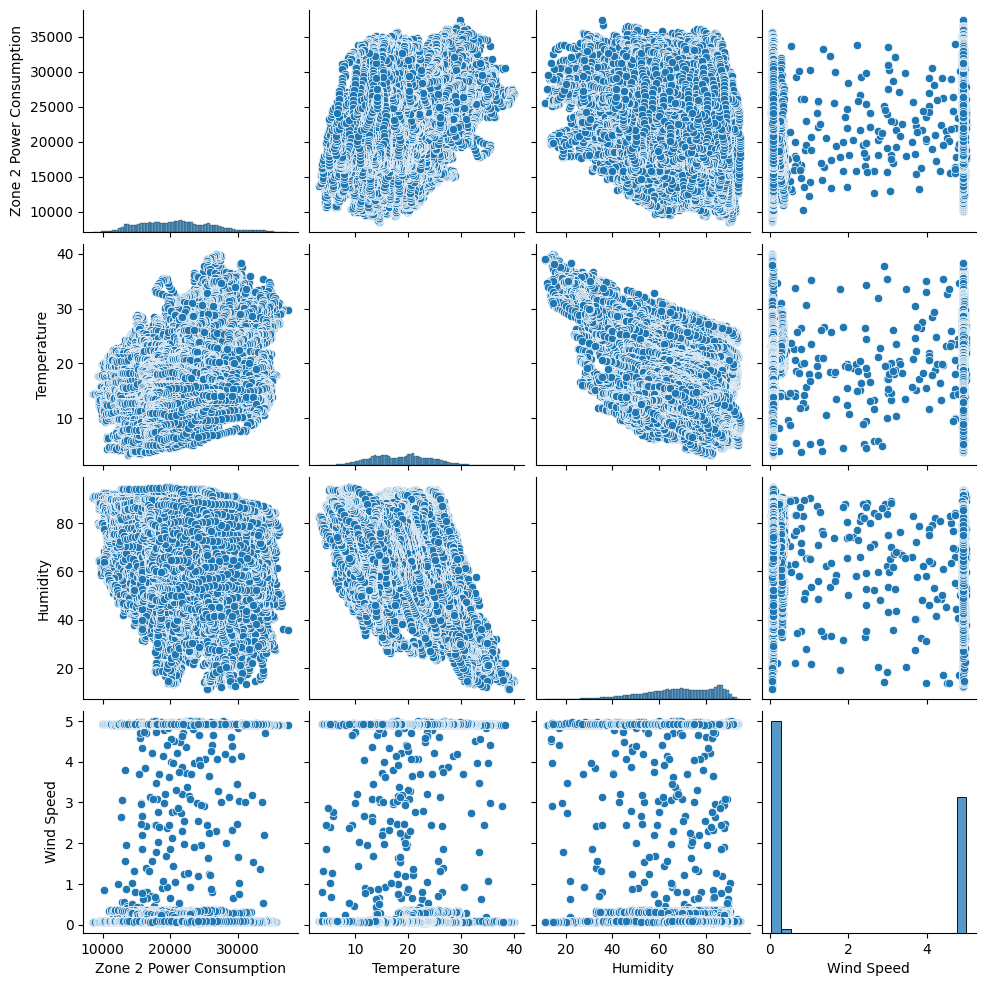

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 2 Power Consumption", "Temperature", "Humidity", "Wind Speed"]])
plt.show()

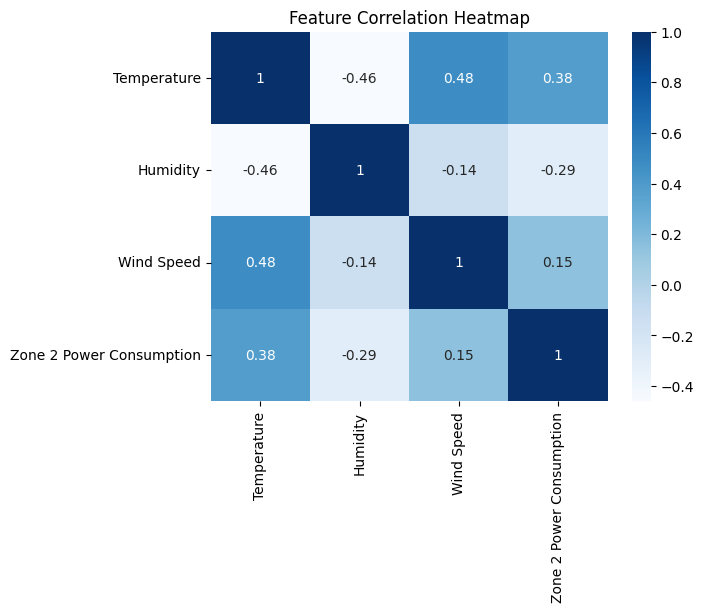

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 1 Power Consumption', 'Zone 3 Power Consumption']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 2 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.16303443002097817
Mean squared error: 22573384.388029266
Root mean squared error: 4751.145586911568

Model evaluation metrics for the test set:
R-squared value: 0.17203109098269975
Mean squared error: 22710533.43616283
Root mean squared error: 4765.556991177718

Model Parameters:
Coefficients: [294.3332167  -48.8185403  -72.65106828]
Interecept: 18967.68529752422


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 2 Power Consumption   R-squared:                       0.165
Model:                                  OLS   Adj. R-squared:                  0.165
Method:                       Least Squares   F-statistic:                     3448.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              09:18:43   Log-Likelihood:            -5.1798e+05
No. Observations:                  

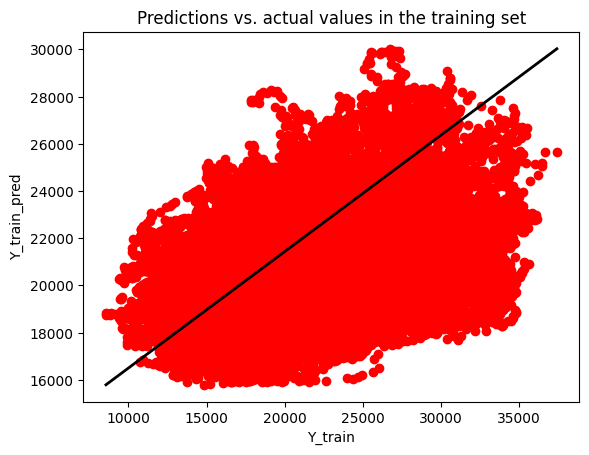

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

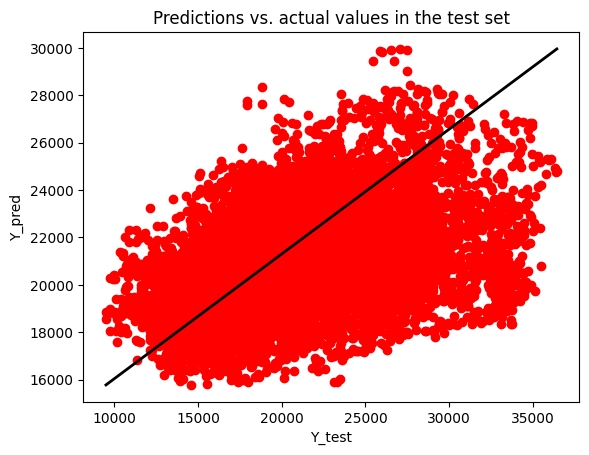

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

## Zone 2 Multilinear Regression Model (TH)
2 weather parameters: Temperature and Humidity

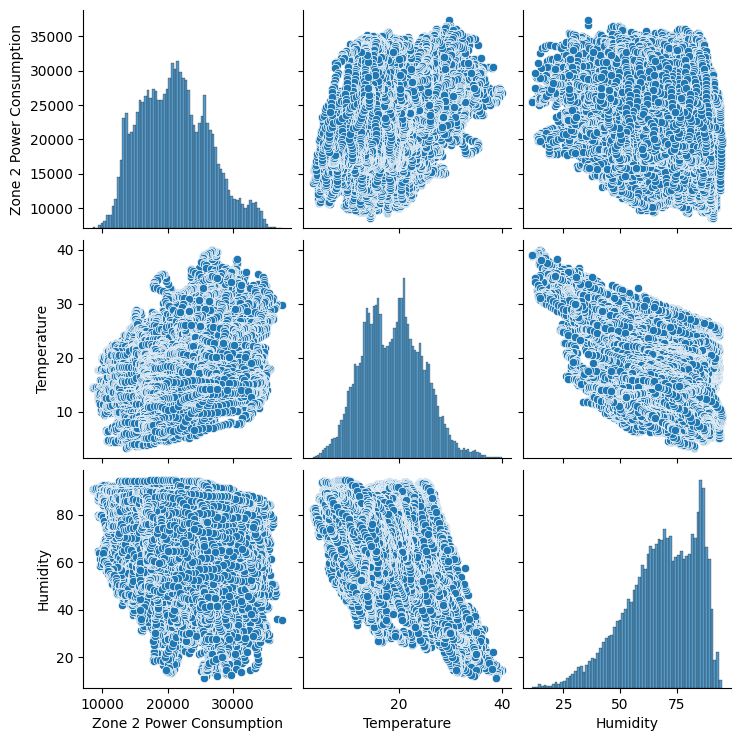

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 2 Power Consumption", "Temperature", "Humidity"]])
plt.show()

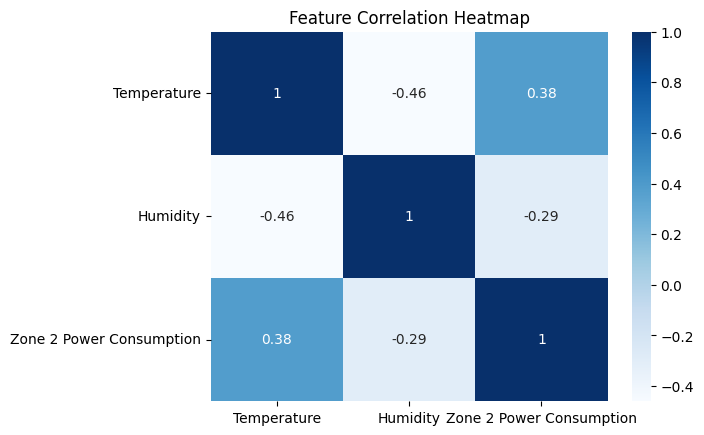

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 1 Power Consumption', 'Zone 3 Power Consumption', 'Wind Speed']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Humidity"]]
y = power["Zone 2 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.1622093920919626
Mean squared error: 22595636.077912807
Root mean squared error: 4753.486728488132

Model evaluation metrics for the test set:
R-squared value: 0.17172588989157656
Mean squared error: 22718904.861115165
Root mean squared error: 4766.43523622373

Model Parameters:
Coefficients: [278.84508956 -49.99671419]
Interecept: 19196.834380860135


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 2 Power Consumption   R-squared:                       0.164
Model:                                  OLS   Adj. R-squared:                  0.164
Method:                       Least Squares   F-statistic:                     5145.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              09:18:51   Log-Likelihood:            -5.1800e+05
No. Observations:                     52397   AI

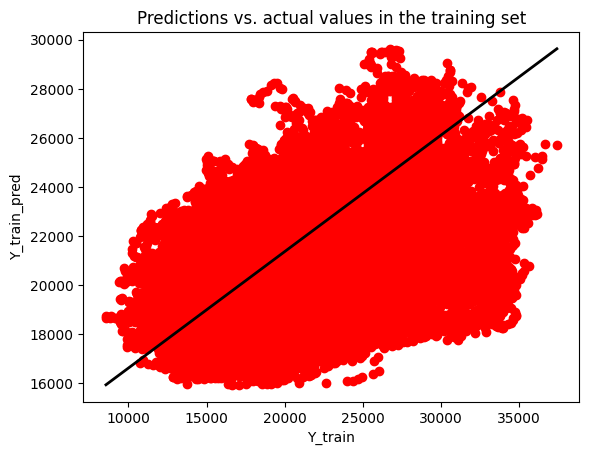

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

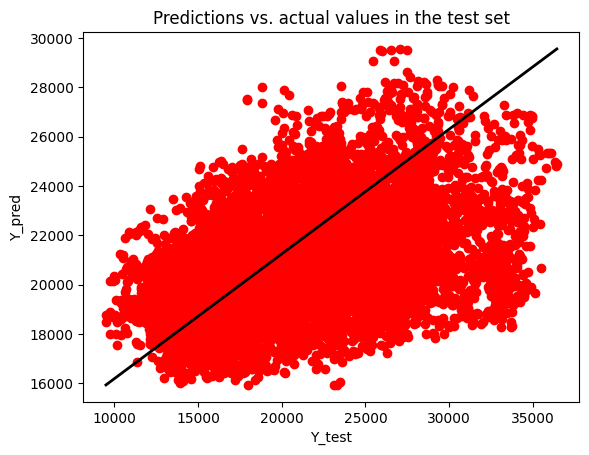

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

# Zone 3 Power Consumption Multilinear Models

## Zone 3 Multilinear Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

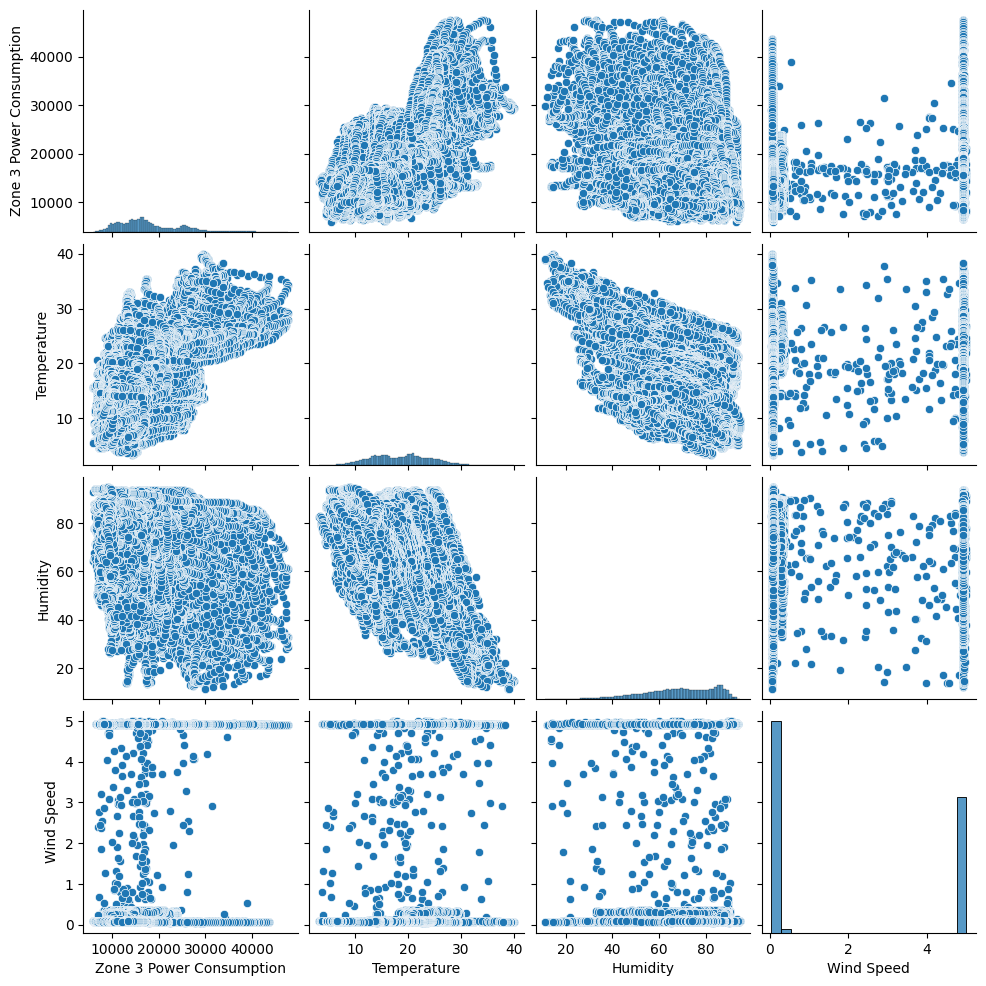

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 3 Power Consumption", "Temperature", "Humidity", "Wind Speed"]])
plt.show()

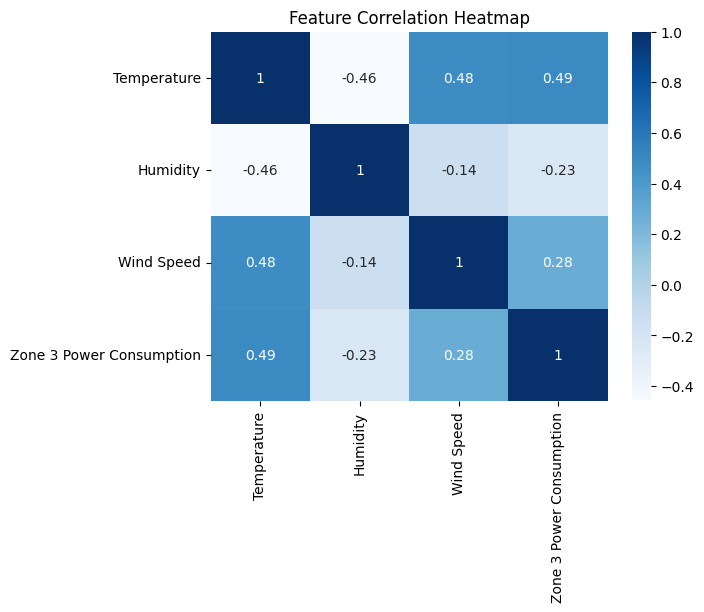

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 1 Power Consumption', 'Zone 2 Power Consumption']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 3 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.24222506510744923
Mean squared error: 33248589.571191963
Root mean squared error: 5766.15899635034

Model evaluation metrics for the test set:
R-squared value: 0.24443821368746121
Mean squared error: 33066577.90879338
Root mean squared error: 5750.354589831255

Model Parameters:
Coefficients: [521.54669342  -4.93504758 162.15543112]
Interecept: 8029.853345808431


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 3 Power Consumption   R-squared:                       0.243
Model:                                  OLS   Adj. R-squared:                  0.243
Method:                       Least Squares   F-statistic:                     5597.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              09:25:34   Log-Likelihood:            -5.2806e+05
No. Observations:                   

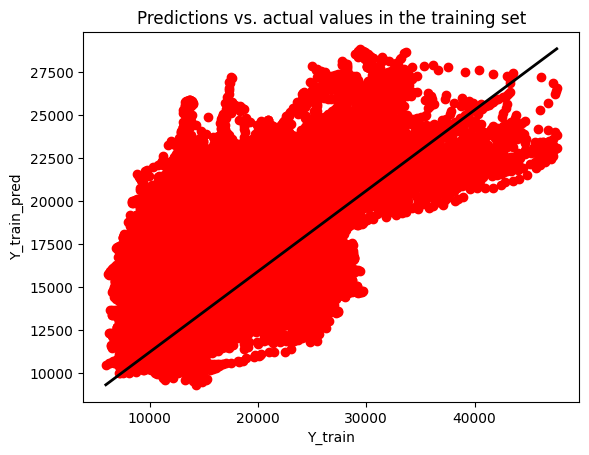

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

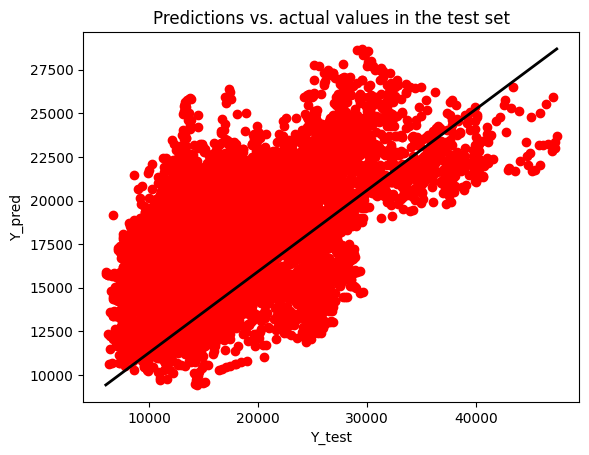

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

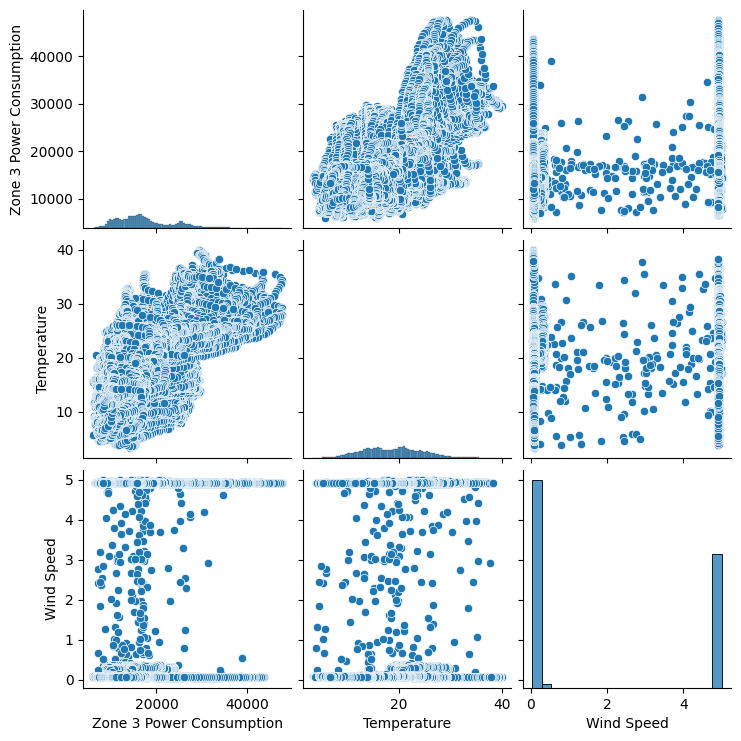

In [ ]:
df = pd.DataFrame(power)
df
sns.pairplot(df[["Zone 3 Power Consumption", "Temperature", "Wind Speed"]])
plt.show()

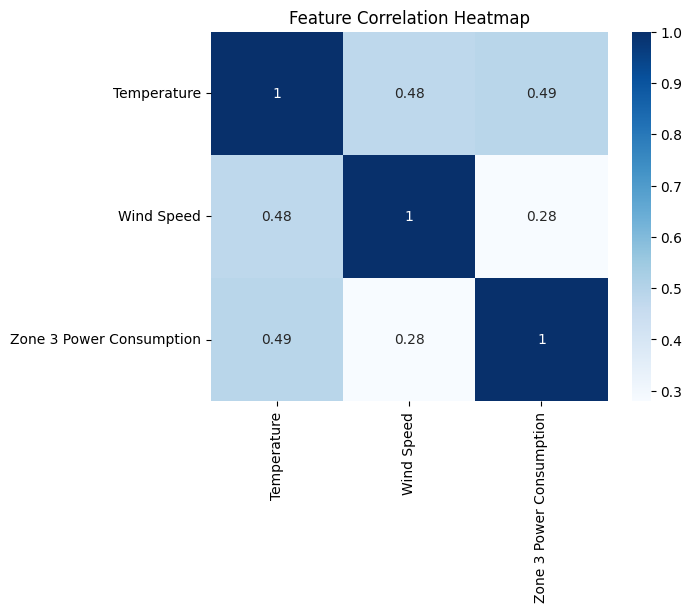

In [ ]:
corr = power.drop(columns=['DateTime', 'Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Humidity']).corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Defining the data into x and y variables
x = power[["Temperature", "Wind Speed"]]
y = power["Zone 3 Power Consumption"]

#Splitting the dataset into training set and the test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Making and training models

model = LinearRegression()

fit_model=model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",fit_model.coef_)
print("Interecept:",fit_model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.24212028333564073
Mean squared error: 33253187.039338488
Root mean squared error: 5766.557642071957

Model evaluation metrics for the test set:
R-squared value: 0.2439469292711407
Mean squared error: 33088078.59175793
Root mean squared error: 5752.223795347147

Model Parameters:
Coefficients: [528.30282333 158.57186199]
Interecept: 7572.920812426237


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 3 Power Consumption   R-squared:                       0.243
Model:                                  OLS   Adj. R-squared:                  0.242
Method:                       Least Squares   F-statistic:                     8387.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              09:25:44   Log-Likelihood:            -5.2807e+05
No. Observations:                     52397   AIC

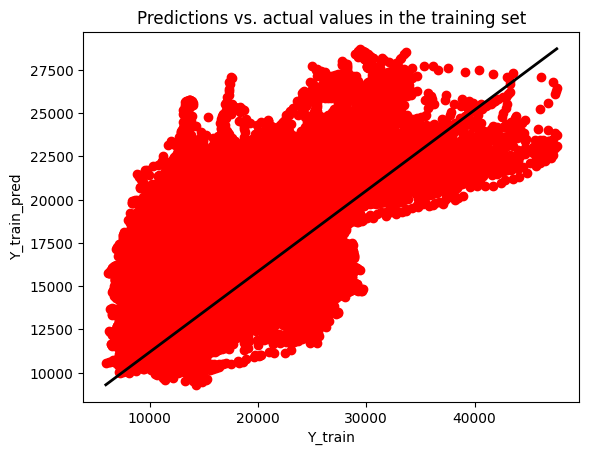

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")
plt.show()

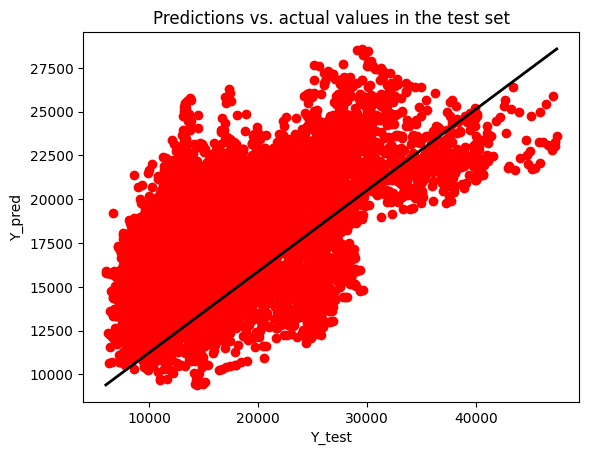

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Predictions vs. actual values in the test set")
plt.show()

# **Polynomial Regression Models**
Independent variables: Temperature, Humidity, Wind Speed<br>
Dependent variable: Zone 1/2/3 Power Consumption

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Zone 1 Power Consumption Polynomial Model


## Zone 1 Polynomial Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 1 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.2259118768095747
Mean squared error: 39246840.99900854
Root mean squared error: 6264.729922271872

Model evaluation metrics for the test set:
R-squared value: 0.23414983563477387
Mean squared error: 39438026.50603047
Root mean squared error: 6279.970263148582

Model Parameters:
Coefficients: [ 0.00000000e+00 -7.87147671e+02 -3.09739707e+00 -2.81035032e+03
  1.63311918e+01  1.06956553e+01  5.86763869e+00 -1.77803845e+00
 -1.15083744e+01  6.54373206e+02]
Interecept: 37052.74852923601


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.204
Model:                                  OLS   Adj. R-squared:                  0.204
Method:                       Least Squares   F-statistic:                     4486.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

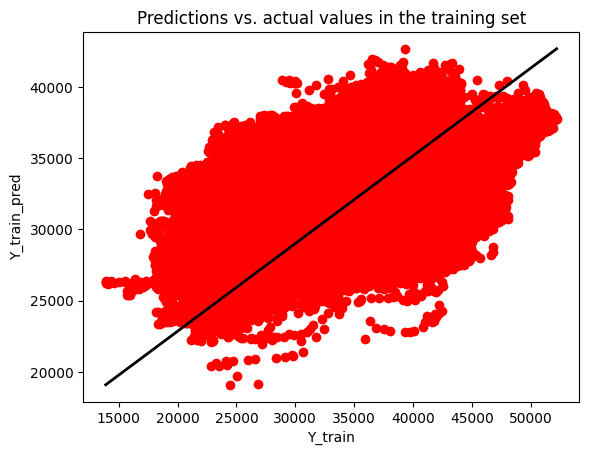

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

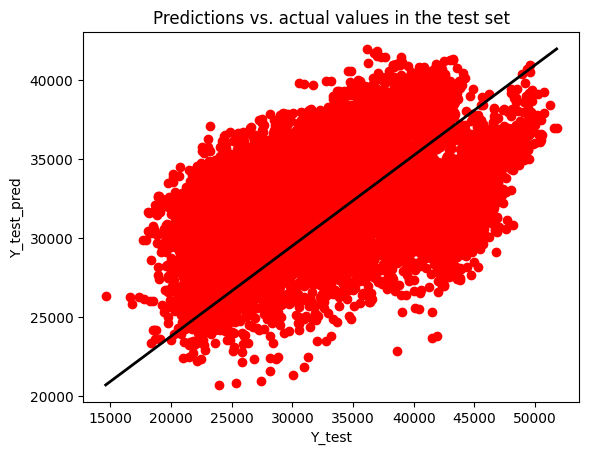

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

## Zone 1 Polynomial Regression Model (TH)
Using 2 weather parameters: Temperature and Humidity.

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity"]]
y = power["Zone 1 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.21912230298138935
Mean squared error: 39591077.41925945
Root mean squared error: 6292.144103503944

Model evaluation metrics for the test set:
R-squared value: 0.228216293644238
Mean squared error: 39743578.684753776
Root mean squared error: 6304.250842467626

Model Parameters:
Coefficients: [   0.         -465.01053482   72.27640435   13.31264952    7.07021492
   -2.02522358]
Interecept: 32120.99552310144


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.203
Model:                                  OLS   Adj. R-squared:                  0.203
Method:                       Least Squares   F-statistic:                     6668.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              20:17:23   Log-Likelihood:            -5.

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

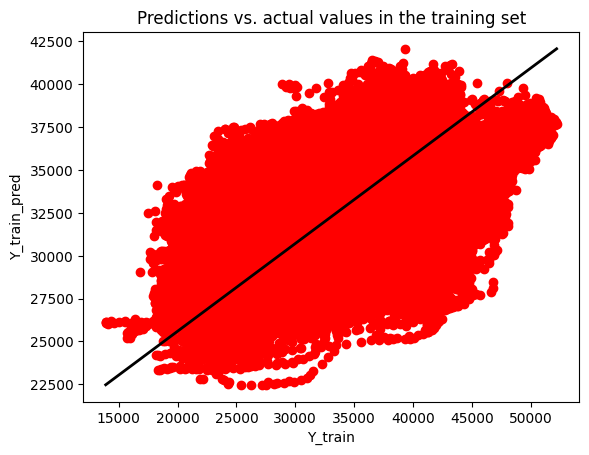

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

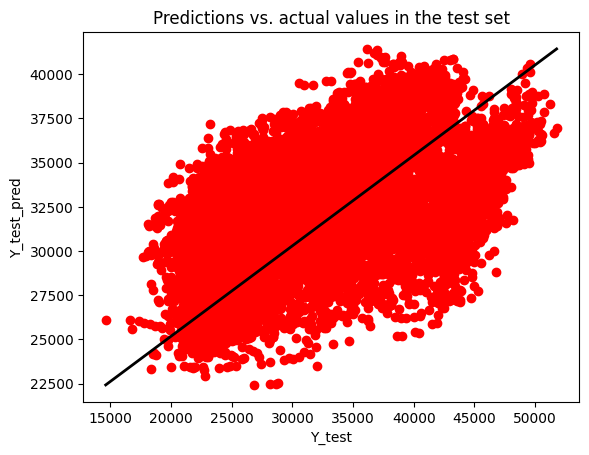

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

In [ ]:
#Defining values of x and y
x = power[["Temperature"]]
y = power["Zone 1 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.19216271195548096
Mean squared error: 40957948.645795286
Root mean squared error: 6399.83973594615

Model evaluation metrics for the test set:
R-squared value: 0.20042208944153483
Mean squared error: 41174861.999772415
Root mean squared error: 6416.764137770097

Model Parameters:
Coefficients: [  0.         596.04318529  -1.49919596]
Interecept: 21695.40895646384


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.194
Model:                                  OLS   Adj. R-squared:                  0.194
Method:                       Least Squares   F-statistic:                 1.259e+04
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              20:17:26   Log-Likelihood:            -5.3359e+05
No. Observations:                  

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

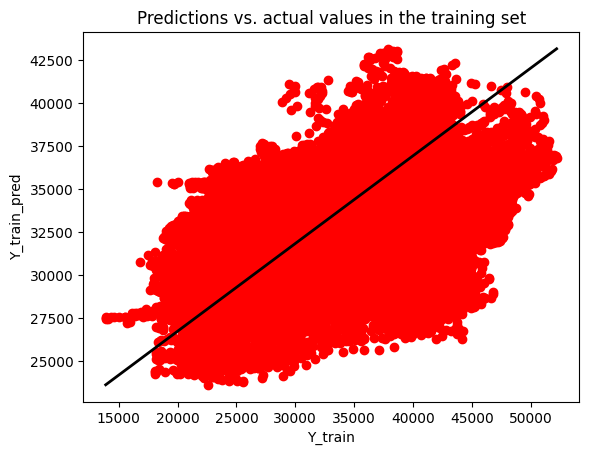

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

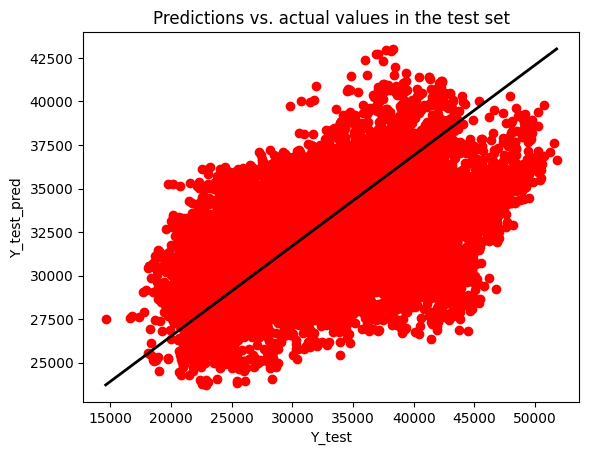

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

# Zone 2 Power Consumption Polynomial Model


## Zone 2 Polynomial Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 2 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.19433673727499046
Mean squared error: 21729145.342575192
Root mean squared error: 4661.453136370159

Model evaluation metrics for the test set:
R-squared value: 0.20543981596253924
Mean squared error: 21794158.488443196
Root mean squared error: 4668.421412902138

Model Parameters:
Coefficients: [ 0.00000000e+00 -9.02588717e+02  1.94927716e+01 -3.34631173e+03
  1.81969261e+01  7.55592242e+00  2.14887368e+01 -1.58983679e+00
 -3.59754930e+00  6.06105897e+02]
Interecept: 28446.3482902817


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 2 Power Consumption   R-squared:                       0.165
Model:                                  OLS   Adj. R-squared:                  0.165
Method:                       Least Squares   F-statistic:                     3448.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

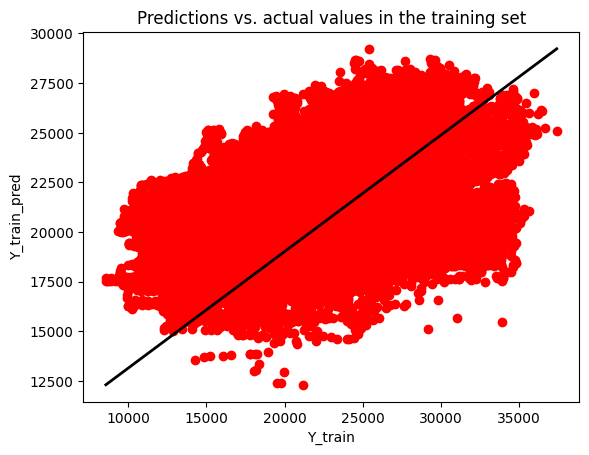

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

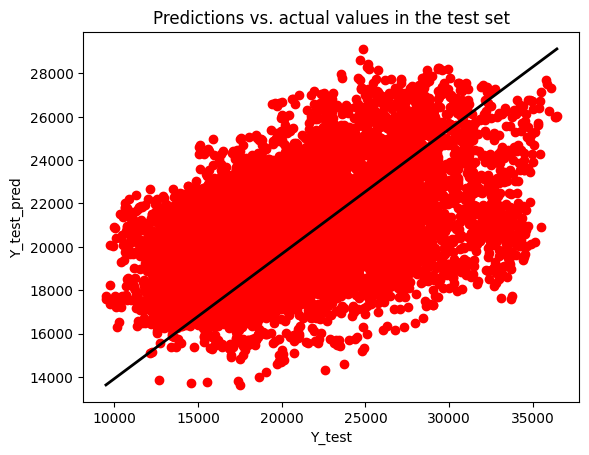

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

## Zone 2 Polynomial Regression Model (TH)
Using 2 weather parameters: Temperature and Humidity.

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity"]]
y = power["Zone 2 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.18670298493787296
Mean squared error: 21935031.500870913
Root mean squared error: 4683.48497391322

Model evaluation metrics for the test set:
R-squared value: 0.19722380861078437
Mean squared error: 22019517.08300111
Root mean squared error: 4692.495826636515

Model Parameters:
Coefficients: [   0.         -849.67469076   44.82969134   19.37810575    6.32423051
   -1.66653967]
Interecept: 26751.864656159705


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 2 Power Consumption   R-squared:                       0.164
Model:                                  OLS   Adj. R-squared:                  0.164
Method:                       Least Squares   F-statistic:                     5145.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              20:22:22   Log-Likelihood:            -

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

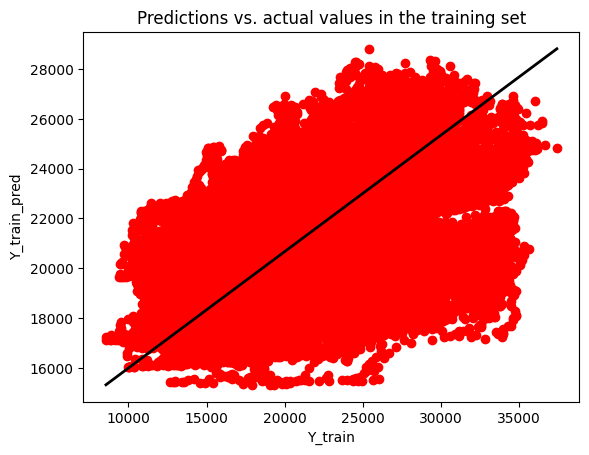

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

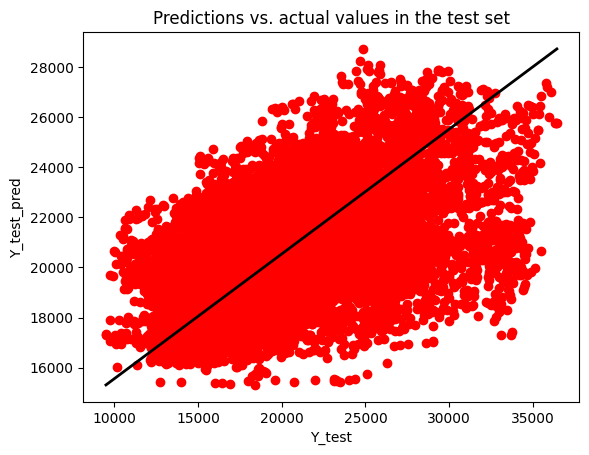

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

# Zone 3 Power Consumption Polynomial Model


## Zone 3 Polynomial Regression Model (THW)
Using all 3 weather parameters: Temperature, Humidity and Wind Speed

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity", "Wind Speed"]]
y = power["Zone 3 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.3276294153957172
Mean squared error: 29501336.845378894
Root mean squared error: 5431.51331079828

Model evaluation metrics for the test set:
R-squared value: 0.32443739182582
Mean squared error: 29565475.67668916
Root mean squared error: 5437.414429367064

Model Parameters:
Coefficients: [ 0.00000000e+00 -2.08503909e+03 -3.48917824e+01 -8.20208847e+03
  4.53764122e+01  1.24137619e+01  5.83688963e+01 -1.26543674e+00
 -1.32244550e+01  1.59172157e+03]
Interecept: 32969.493252658525


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 3 Power Consumption   R-squared:                       0.243
Model:                                  OLS   Adj. R-squared:                  0.243
Method:                       Least Squares   F-statistic:                     5597.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
T

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

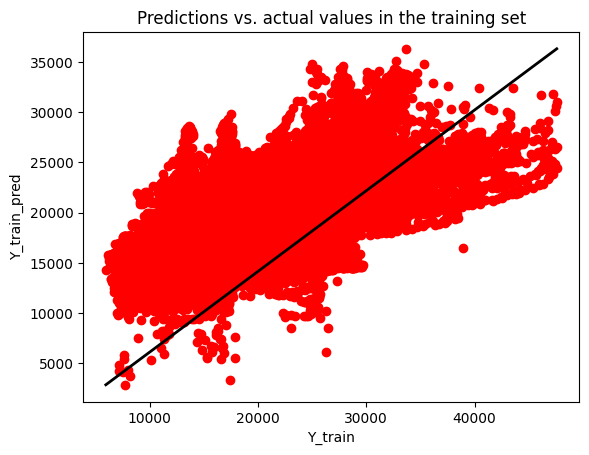

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

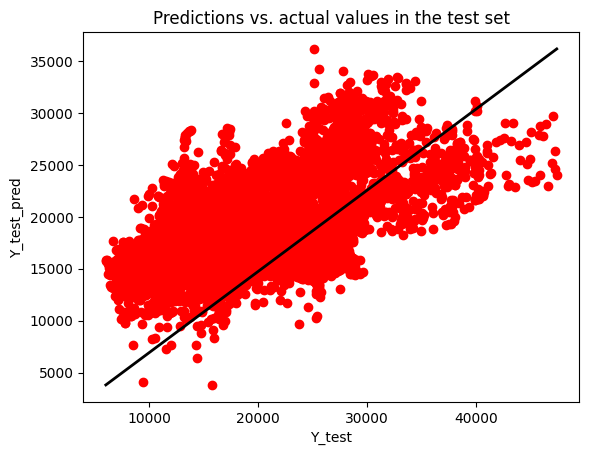

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

## Zone 3 Polynomial Regression Model (TH)
Using 2 weather parameters: Temperature and Humidity.

In [ ]:
#Defining values of x and y
x = power[["Temperature", "Humidity"]]
y = power["Zone 3 Power Consumption"]

#Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#Creating polynomial Features for the model
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

#Training the Polynomial Regression model
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_test_pred=model.predict(x_test_poly)
y_train_pred=model.predict(x_train_poly)

#Computing the R-squared, MSE and RMSE values for the predictions made on the training set

root_mean_squared_error = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model evaluation metrics for the training set:")
print("R-squared value:",r2_score(y_train, y_train_pred))
print("Mean squared error:",mean_squared_error(y_train, y_train_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing the R-squared, MSE and  RMSE values for the predictions made on the test set

root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nModel evaluation metrics for the test set:")
print("R-squared value:",r2_score(y_test, y_test_pred))
print("Mean squared error:",mean_squared_error(y_test, y_test_pred))
print("Root mean squared error:",root_mean_squared_error)

#Computing Model Parameters like Coefficients and Intercepts
print("\nModel Parameters:")
print("Coefficients:",model.coef_)
print("Interecept:",model.intercept_)

# Print the summary statistics

print("\n\n Summary statistics:")
X_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, X_with_const).fit()
print(ols_model.summary())

Model evaluation metrics for the training set:
R-squared value: 0.3023908310492682
Mean squared error: 30608720.177359886
Root mean squared error: 5532.514814924573

Model evaluation metrics for the test set:
R-squared value: 0.29612642285714197
Mean squared error: 30804483.363466196
Root mean squared error: 5550.178678517133

Model Parameters:
Coefficients: [ 0.00000000e+00 -2.10123510e+03  8.94802081e+00  5.33007563e+01
  1.00201948e+01 -1.42619055e+00]
Interecept: 30620.787928126207


 Summary statistics:
                               OLS Regression Results                               
Dep. Variable:     Zone 3 Power Consumption   R-squared:                       0.240
Model:                                  OLS   Adj. R-squared:                  0.240
Method:                       Least Squares   F-statistic:                     8267.
Date:                      Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                              20:26:22   Log-Likelihood:

Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

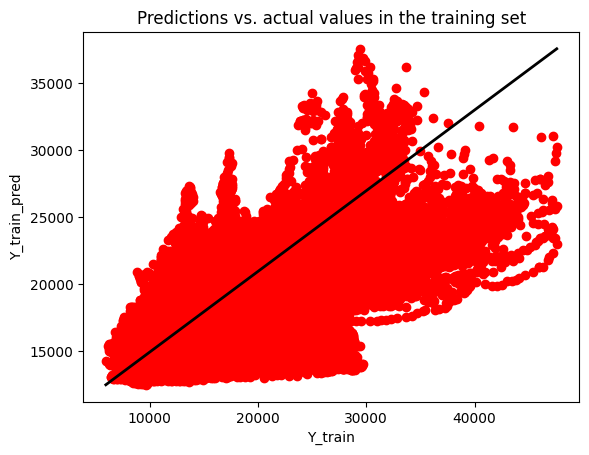

In [ ]:
plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

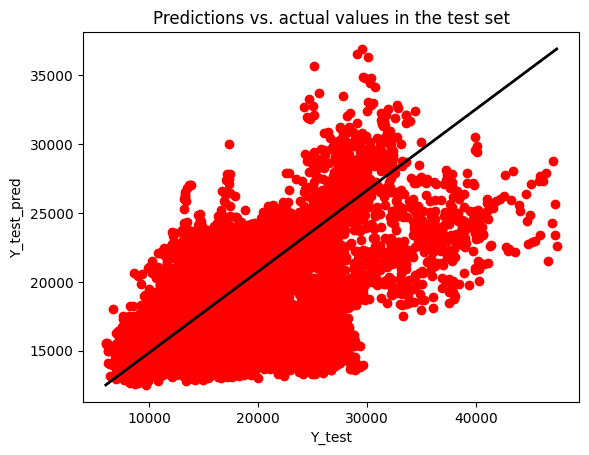

In [ ]:
plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

## Prediction Function and User Interface
An interface to allow users to enter input parameters and return an estimated power consumption. <br>Aan interface to allow users to add observations to the underlying database, and automatically update the data model to incorporate the new observations

In [18]:
# --- Training ---

# Zone 1: Polynomial Regression (Temperature + Humidity)
x_zone1 = power[["Temperature", "Humidity"]]
y_zone1 = power["Zone 1 Power Consumption"]
x_train_zone1, x_test_zone1, y_train_zone1, y_test_zone1 = train_test_split(x_zone1, y_zone1, test_size=0.2, random_state=42)
poly_zone1 = PolynomialFeatures(degree=2)
x_train_poly_zone1 = poly_zone1.fit_transform(x_train_zone1)
x_test_poly_zone1 = poly_zone1.transform(x_test_zone1)
model_zone1 = LinearRegression()
model_zone1.fit(x_train_poly_zone1, y_train_zone1)

# Zone 2: Linear Regression (Temperature + Humidity)
x_zone2 = power[["Temperature", "Humidity"]]
y_zone2 = power["Zone 2 Power Consumption"]
x_train_zone2, x_test_zone2, y_train_zone2, y_test_zone2 = train_test_split(x_zone2, y_zone2, test_size=0.2, random_state=42)
model_zone2 = LinearRegression()
model_zone2.fit(x_train_zone2, y_train_zone2)

# Zone 3: Polynomial Regression (Temperature + Humidity)
x_zone3 = power[["Temperature", "Humidity"]]
y_zone3 = power["Zone 3 Power Consumption"]
x_train_zone3, x_test_zone3, y_train_zone3, y_test_zone3 = train_test_split(x_zone3, y_zone3, test_size=0.2, random_state=42)
poly_zone3 = PolynomialFeatures(degree=2)
x_train_poly_zone3 = poly_zone3.fit_transform(x_train_zone3)
x_test_poly_zone3 = poly_zone3.transform(x_test_zone3)
model_zone3 = LinearRegression()
model_zone3.fit(x_train_poly_zone3, y_train_zone3)

# --- Prediction Function ---

def predict_power(temperature, humidity, zone):
    """Predicts power consumption for the given zone."""
    input_data = pd.DataFrame({'Temperature': [temperature], 'Humidity': [humidity]})
    
    # Reusing the fitted PolynomialFeatures instance for each zone's prediction
    if zone == 1:
        input_data_poly = poly_zone1.transform(input_data)
        prediction = model_zone1.predict(input_data_poly)[0]
    elif zone == 3:
        input_data_poly = poly_zone3.transform(input_data)
        prediction = model_zone3.predict(input_data_poly)[0]
    else:
        prediction = model_zone2.predict(input_data)[0]
    
    return prediction

# --- User Interface (CLI) ---
def user_interface():
    print("Welcome to the Power Consumption Prediction Tool!")
    
    # Taking user input for temperature and humidity
    try:
        temperature = float(input("Enter the temperature (°C): "))
        humidity = float(input("Enter the humidity (%): "))
        
        # Zone selection
        print("\nSelect the Zone for Prediction:")
        print("1: Zone 1")
        print("2: Zone 2")
        print("3: Zone 3")
        zone = int(input("Enter the zone number (1, 2, or 3): "))
        
        # Make the prediction for the selected zone
        predicted_power = predict_power(temperature, humidity, zone)
        
        # Output the result
        print(f"\nPredicted Power Consumption for Zone {zone}: {predicted_power:.2f} kW")
        
        # Ask user if they want to save the observation
        save_data = input("\nDo you want to add this observation to the dataset? (yes/no): ").strip().lower()
        
        if save_data == 'yes':
            # Prepare the new observation
            new_data = {
                'Temperature': temperature,
                'Humidity': humidity,
                'Zone': zone,
                'Predicted Power Consumption (kW)': predicted_power
            }

            # Create a DataFrame for the new observation
            new_observation_df = pd.DataFrame([new_data])
            
            # Save the new observation to a new CSV file
            output_file = 'New_Power_Consumption_Observations.csv'
            try:
                # Append to the existing file if it exists
                new_observation_df.to_csv(output_file, mode='a', header=not pd.io.common.file_exists(output_file), index=False)
            except Exception as e:
                print(f"Error saving the file: {e}")
                return

            print(f"Observation added and saved to '{output_file}' successfully!")
        
        else:
            print("Observation not saved.")
    
    except ValueError:
        print("Invalid input. Please enter numeric values.")

# Run the user interface
if __name__ == "__main__":
    user_interface()

Welcome to the Power Consumption Prediction Tool!


Enter the temperature (°C):  22
Enter the humidity (%):  10



Select the Zone for Prediction:
1: Zone 1
2: Zone 2
3: Zone 3


Enter the zone number (1, 2, or 3):  2



Predicted Power Consumption for Zone 2: 24843.86 kW



Do you want to add this observation to the dataset? (yes/no):  yes


Observation added and saved to 'New_Power_Consumption_Observations.csv' successfully!


In [19]:
user_interface()

Welcome to the Power Consumption Prediction Tool!


Enter the temperature (°C):  35
Enter the humidity (%):  80



Select the Zone for Prediction:
1: Zone 1
2: Zone 2
3: Zone 3


Enter the zone number (1, 2, or 3):  1



Predicted Power Consumption for Zone 1: 45034.65 kW



Do you want to add this observation to the dataset? (yes/no):  yes


Observation added and saved to 'New_Power_Consumption_Observations.csv' successfully!


In [20]:
user_interface()

Welcome to the Power Consumption Prediction Tool!


Enter the temperature (°C):  23
Enter the humidity (%):  50



Select the Zone for Prediction:
1: Zone 1
2: Zone 2
3: Zone 3


Enter the zone number (1, 2, or 3):  3



Predicted Power Consumption for Zone 3: 18887.96 kW



Do you want to add this observation to the dataset? (yes/no):  yes


Observation added and saved to 'New_Power_Consumption_Observations.csv' successfully!
